In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
data = pd.read_csv("anomaly_data.csv")

In [3]:
data.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0,0,75.0,0.000000,75,75,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0,0,2655.0,2261.327486,4254,1056,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/7/2019 1:24,141,0,3,...,0.0,0,0,70.5,0.707107,71,70,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,4/9/2019 3:58,151,0,2,...,0.0,0,0,151.0,0.000000,151,151,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/9/2019 1:41,153,2,1,...,0.0,0,0,76.5,0.707107,77,76,Anomaly,Mirai,Mirai-Hostbruteforceg


In [4]:
data.shape

(625783, 86)

In [5]:
null_check = data.isnull().sum()

null_check.to_csv('null_count')
#no null data has been found

In [6]:
data['Label'].unique()

array(['Anomaly', 'Normal'], dtype=object)

In [7]:
data['Fwd_PSH_Flags'].unique()

array([0], dtype=int64)

In [8]:
data['Bwd_PSH_Flags'].unique()

array([0, 1], dtype=int64)

In [9]:
data['Fwd_URG_Flags'].unique()

array([0], dtype=int64)

In [10]:
data['Bwd_URG_Flags'].unique()

array([0, 1], dtype=int64)

In [11]:
data['FIN_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [12]:
data['RST_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [13]:
data['URG_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [14]:
data['CWE_Flag_Count'].unique()

array([0, 1], dtype=int64)

In [15]:
data['ECE_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [16]:
data['Down/Up_Ratio'].unique()

array([ 1,  2,  0,  3,  4,  5, 10,  7,  8,  6, 13, 12, 11,  9, 14],
      dtype=int64)

In [17]:
data['Fwd_Byts/b_Avg'].unique()

array([0], dtype=int64)

In [18]:
data['Fwd_Pkts/b_Avg'].unique()

array([0], dtype=int64)

In [19]:
data['Fwd_Blk_Rate_Avg'].unique()

array([0], dtype=int64)

In [20]:
data['Bwd_Byts/b_Avg'].unique()

array([0], dtype=int64)

In [21]:
data['Bwd_Pkts/b_Avg'].unique()

array([0], dtype=int64)

In [22]:
data['Bwd_Blk_Rate_Avg'].unique()

array([0], dtype=int64)

In [23]:
data['Init_Fwd_Win_Byts'].unique()

array([-1], dtype=int64)

In [24]:
data['Fwd_Seg_Size_Min'].unique()

array([0], dtype=int64)

In [25]:
print(data[data.Label=='Anomaly'].shape)
print(data[data.Label=='Normal'].shape)

(585710, 86)
(40073, 86)


In [26]:
temp_ignore_cols = set(['Flow_ID', 'Label', 'Fwd_PSH_Flags', 'Fwd_URG_Flags', 'Fwd_Byts/b_Avg', 
                        'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg','Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',
                        'Init_Fwd_Win_Byts', 'Fwd_Seg_Size_Min', 'Cat', 'Sub_Cat'])

In [27]:
cols = set(data.columns)

In [28]:
TRAIN_COLS = list(cols-temp_ignore_cols)
TG_COL = ["Label"]
print("Number of Features :", len(TRAIN_COLS))

Number of Features : 72


In [29]:
corr = data[TRAIN_COLS+TG_COL].corr()
corr

,Flow_Pkts/s,Flow_Duration,Bwd_IAT_Tot,Pkt_Size_Avg,Bwd_PSH_Flags,TotLen_Fwd_Pkts,Pkt_Len_Mean,Idle_Min,Tot_Bwd_Pkts,Subflow_Fwd_Pkts,...,Active_Mean,Pkt_Len_Min,Bwd_IAT_Mean,Bwd_IAT_Max,Bwd_Seg_Size_Avg,Flow_IAT_Min,Subflow_Bwd_Pkts,Flow_IAT_Max,SYN_Flag_Cnt,Dst_Port
Flow_Pkts/s,1.000000,-0.060482,-0.057120,-0.255823,-0.044816,-0.078895,-0.256423,-0.082030,-0.111406,0.409807,...,-0.016867,-0.203893,-0.069405,-0.061647,-0.251164,-0.087275,-0.111406,-0.066813,-0.112178,-0.115974
Flow_Duration,-0.060482,1.000000,0.912065,-0.111317,0.054156,0.089187,-0.106195,0.587755,0.215306,0.001276,...,0.318634,-0.104844,0.746066,0.883815,-0.110422,0.504674,0.215306,0.956828,0.331486,-0.063070
Bwd_IAT_Tot,-0.057120,0.912065,1.000000,-0.125997,0.048255,-0.022402,-0.122602,0.522876,0.245691,-0.025835,...,0.287941,-0.115782,0.822225,0.970454,-0.124813,0.517580,0.245691,0.878610,0.373826,-0.083333
Pkt_Size_Avg,-0.255823,-0.111317,-0.125997,1.000000,-0.021393,0.426189,0.996426,-0.169087,0.003414,-0.173451,...,-0.046344,0.901149,-0.163231,-0.139542,0.979022,-0.178256,0.003414,-0.128868,-0.308331,0.320271
Bwd_PSH_Flags,-0.044816,0.054156,0.048255,-0.021393,1.000000,-0.028162,-0.022474,-0.015392,0.030593,-0.039449,...,0.009961,-0.042380,0.024060,0.048730,-0.019765,-0.017639,0.030593,0.051636,-0.052242,0.028314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Flow_IAT_Min,-0.087275,0.504674,0.517580,-0.178256,-0.017639,-0.094695,-0.180348,0.889170,0.089806,-0.088626,...,0.000680,-0.144699,0.724376,0.590815,-0.177101,1.000000,0.089806,0.612777,0.616690,-0.133367
Subflow_Bwd_Pkts,-0.111406,0.215306,0.245691,0.003414,0.030593,-0.172527,0.008743,0.088252,1.000000,-0.101333,...,0.249947,-0.019456,0.112400,0.170215,-0.007752,0.089806,1.000000,0.144465,0.145492,-0.094940
Flow_IAT_Max,-0.066813,0.956828,0.878610,-0.128868,0.051636,0.007068,-0.126051,0.701704,0.144465,-0.030684,...,0.251653,-0.116595,0.820395,0.906055,-0.128576,0.612777,0.144465,1.000000,0.393934,-0.079585
SYN_Flag_Cnt,-0.112178,0.331486,0.373826,-0.308331,-0.052242,-0.146714,-0.310350,0.568117,0.145492,-0.115098,...,0.132724,-0.250294,0.518563,0.424600,-0.304259,0.616690,0.145492,0.393934,1.000000,-0.201849


In [30]:
corr.to_csv('correlation_matrix')

In [31]:
print(cols)

{'Bwd_IAT_Tot', 'Bwd_PSH_Flags', 'TotLen_Fwd_Pkts', 'Idle_Min', 'Tot_Bwd_Pkts', 'ECE_Flag_Cnt', 'Subflow_Bwd_Byts', 'Fwd_IAT_Std', 'Fwd_Pkt_Len_Mean', 'Dst_IP', 'Bwd_Pkts/b_Avg', 'CWE_Flag_Count', 'Fwd_Pkts/s', 'URG_Flag_Cnt', 'Src_Port', 'Fwd_IAT_Mean', 'Pkt_Len_Var', 'Down/Up_Ratio', 'Protocol', 'Fwd_Pkt_Len_Max', 'ACK_Flag_Cnt', 'Idle_Max', 'Bwd_Pkt_Len_Mean', 'Fwd_IAT_Min', 'Bwd_Pkt_Len_Std', 'Fwd_Pkts/b_Avg', 'Flow_ID', 'Fwd_Byts/b_Avg', 'Bwd_IAT_Std', 'Pkt_Len_Max', 'Sub_Cat', 'Flow_IAT_Mean', 'Active_Max', 'TotLen_Bwd_Pkts', 'Fwd_Act_Data_Pkts', 'Flow_Byts/s', 'Src_IP', 'Bwd_Header_Len', 'FIN_Flag_Cnt', 'Active_Mean', 'Pkt_Len_Min', 'Bwd_IAT_Mean', 'Flow_IAT_Min', 'Subflow_Bwd_Pkts', 'Init_Fwd_Win_Byts', 'Flow_IAT_Max', 'Bwd_Byts/b_Avg', 'Bwd_Blk_Rate_Avg', 'Flow_Pkts/s', 'Flow_Duration', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Min', 'Pkt_Len_Mean', 'Subflow_Fwd_Pkts', 'Label', 'Timestamp', 'Fwd_Header_Len', 'Idle_Std', 'Bwd_Pkt_Len_Max', 'Flow_IAT_Std', 'Bwd_URG_Flags', 'Fwd_IAT_Tot', 'F

In [32]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [33]:
data['Src_IP']= label_encoder.fit_transform(data['Src_IP'])

In [34]:
data['Dst_IP']= label_encoder.fit_transform(data['Dst_IP'])

In [35]:
data['Timestamp']= label_encoder.fit_transform(data['Timestamp'])

In [36]:
data['Label']= label_encoder.fit_transform(data['Label'])

In [37]:
data.head()
data.shape


(625783, 86)

In [38]:
train_data = data[TRAIN_COLS+TG_COL]


In [39]:
train_data.head()
train_data.shape

(625783, 73)

In [40]:
print(train_data[np.isfinite(train_data)])

         Flow_Pkts/s  Flow_Duration  Bwd_IAT_Tot  Pkt_Size_Avg  Bwd_PSH_Flags  \
0       26666.666670             75            0   1921.000000              0   
1         564.971751           5310         5310      0.000000              0   
2       21276.595740            141          141   1398.000000              0   
3       13245.033110            151          151   2082.000000              0   
4       19607.843140            153            0    575.333333              0   
...              ...            ...          ...           ...            ...   
625778   7220.216606            277            0     27.000000              0   
625779   1206.272618           1658         1658      0.000000              0   
625780  25974.025970             77            0      0.000000              0   
625781  12500.000000            240            0   1850.666667              0   
625782  15151.515150            198            0   1906.666667              0   

        TotLen_Fwd_Pkts  Pk

In [41]:
import numpy as np


train_data= train_data[np.isfinite(train_data).all(1)]
# train_label = data['Label'] 
# train_label = train_label[np.isfinite(train_label).all(1)]
train_data.shape



(625415, 73)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaler.transform(train_data)

array([[5.32935358e-03, 7.40125821e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.54518058e-01, 0.00000000e+00],
       [1.08993706e-04, 5.30990268e-02, 5.31143409e-02, ...,
        1.00000000e+00, 8.47470591e-03, 0.00000000e+00],
       [4.25133508e-03, 1.40023804e-03, 1.41038080e-03, ...,
        0.00000000e+00, 1.37981674e-01, 0.00000000e+00],
       ...,
       [5.19082488e-03, 7.60129222e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.37981674e-01, 0.00000000e+00],
       [2.49600891e-03, 2.39040637e-03, 0.00000000e+00, ...,
        0.00000000e+00, 7.61560937e-01, 1.00000000e+00],
       [3.02631406e-03, 1.97033496e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.54518058e-01, 0.00000000e+00]])

In [43]:
print(train_data.shape)
print(data['Label'].shape)

(625415, 73)
(625783,)


In [44]:
from sklearn.model_selection import train_test_split


y = train_data['Label']
X = train_data.drop(columns=['Label'])
# X = train_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [47]:
!pip install xgboost
import xgboost as xgb
  
xgb_classifier = xgb.XGBClassifier()
  
# fit the regressor with x and y data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [48]:
from sklearn.metrics import accuracy_score

Y_pred = xgb_classifier.predict(X_test)
Y_pred = np.where(Y_pred >=0.5, 1, 0)
print(accuracy_score(y_test, Y_pred))

0.9999872085140131


In [49]:
import math
 
MSE = np.square(np.subtract(y_test, Y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.003576518696571724


In [50]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, roc_auc_score

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, Y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, Y_pred)

RMSE = math.sqrt(MSE)


# R-squared scores
r2 = r2_score(y_test, Y_pred)

F1 = f1_score(y_test, Y_pred)

roc_auc = roc_auc_score(y_test, Y_pred)



# Print metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared scores:', r2)

print("Root Mean Square Error:", RMSE)
print("F1 score:", F1)
print("ROC Auc score:", roc_auc)


Mean Absolute Error: 1.2791485986927101e-05
Mean Squared Error: 1.2791485986927101e-05
R-squared scores: 0.9997882468036147
Root Mean Square Error: 0.003576518696571724
F1 score: 0.9999009508716323
ROC Auc score: 0.9999009606813904


In [51]:
import pickle
# save the model to disk
filename = 'XGBoost_model.sav'
pickle.dump(xgb_classifier, open(filename, 'wb'))

# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

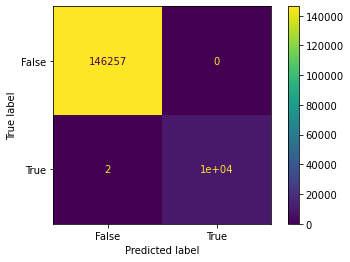

In [52]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

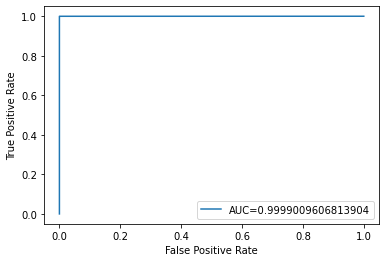

In [53]:
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred)
auc = metrics.roc_auc_score(y_test, Y_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [54]:
sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('Specificity : ', specificity)

Sensitivity :  1.0
Specificity :  0.999801921362781
